<a href="https://colab.research.google.com/github/ansarmuhammad/AIAGENTS/blob/main/StatisticalSignificance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('statistical_significance.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    34 non-null     object
 1   number  34 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 672.0+ bytes


In [ ]:
control_group1 = df[df['number'] >= 26]

In [ ]:
control_group1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 0 to 33
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    14 non-null     object
 1   number  14 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 336.0+ bytes


In [ ]:
control_group2 = df[df['number'] <= 25]

In [ ]:
control_group2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 3 to 31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    20 non-null     object
 1   number  20 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 480.0+ bytes


In [ ]:
control_mean1 = control_group1['number'].mean()
control_mean1

35.92857142857143

In [ ]:
control_mean2 = control_group2['number'].mean()
control_mean2

16.2

In [ ]:
control_difference = round(control_mean1 - control_mean2)
control_difference

20

In [ ]:
columns = ['Group1', 'Group2', 'Difference']
index = ['Control']
data = [control_mean1, control_mean2, control_difference]

output_df = pd.DataFrame([data], index = index, columns = columns)
output_df

,Group1,Group2,Difference
Control,35.928571,16.2,20


In [ ]:
values = list(df['number'])
values

[26,
 29,
 50,
 14,
 5,
 36,
 37,
 25,
 19,
 25,
 45,
 20,
 15,
 10,
 38,
 13,
 35,
 23,
 10,
 18,
 15,
 27,
 35,
 18,
 36,
 32,
 10,
 25,
 13,
 23,
 10,
 13,
 45,
 32]

In [ ]:
for i in range(1, 151):
  group1_indexes = random.sample(range(0, len(values) -1), 15)
  group2_indexes= [x for x in range(0, len(values) -1) if x not in group1_indexes]
  # print("Group1", group1_indexes)
  # print("Group2", group2_indexes)
  group1_values = [values[x] for x in group1_indexes]
  group2_values = [values[x] for x in group2_indexes]
  # print("Group1 Values", group1_values)
  # print("Group2 Values", group2_values)
  group1_mean = sum(group1_values) / len(group1_values)
  group2_mean = sum(group2_values) / len(group2_values)
  # print("Group1 Mean", group1_mean)
  # print("Group2 Mean", group2_mean)
  difference = round(group1_mean - group2_mean)
  # print("Difference: ", difference)
  output_df.loc[f'Iter{i}'] = [group1_mean, group2_mean, difference]

In [ ]:
output_df

,Group1,Group2,Difference
Control,35.928571,16.200000,20.0
Iter1,0.200000,3.000000,-3.0
Iter2,1.000000,1.000000,0.0
Iter3,1.800000,-1.000000,3.0
Iter4,2.200000,-2.000000,4.0
...,...,...,...
Iter146,1.533333,-0.333333,2.0
Iter147,1.200000,0.500000,1.0
Iter148,-0.066667,3.666667,-4.0
Iter149,0.866667,1.333333,0.0


In [ ]:
output_df['Difference'].describe()

,Difference
count,151.000000
mean,0.264901
std,3.569691
min,-10.000000
25%,-2.000000
50%,0.000000
75%,2.500000
max,20.000000


In [ ]:
output_df['Difference'].value_counts()

,count
Difference,
0.0,19
1.0,18
-1.0,18
4.0,15
2.0,15
3.0,12
-4.0,12
-2.0,11
-3.0,10


[-10.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.   4.   5.
   6.   7.   8.  20.] [ 1  2  4  3 12 10 11 18 19 18 15 12 15  6  2  1  1  1]


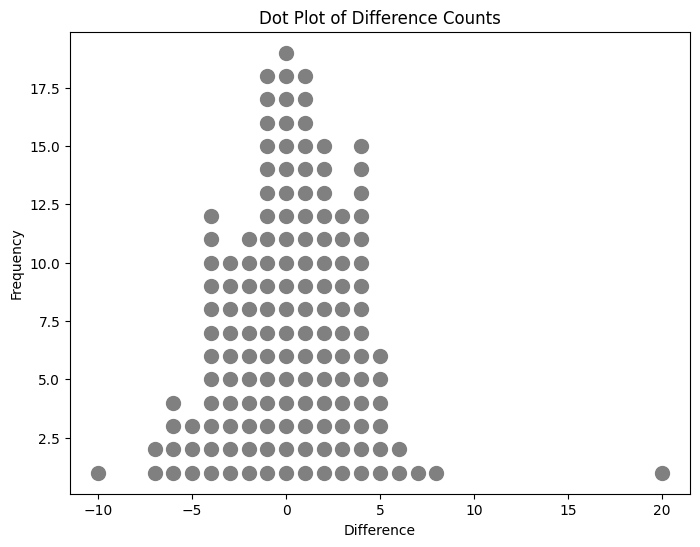

In [ ]:
values, counts = np.unique(output_df['Difference'], return_counts = True)
print(values, counts)

x_coords = []
y_coords = []

for i, val in enumerate(values):
  x_coords.extend([val] * counts[i])
  y_coords.extend(np.arange(1, counts[i] + 1))

plt.figure(figsize=(8, 6))
plt.scatter(x_coords, y_coords, color = 'grey', s = 100)

plt.title('Dot Plot of Difference Counts')
plt.xlabel('Difference')
plt.ylabel('Frequency')

plt.show()

In [ ]:
total_iters = 150
count_difference_equal_control = output_df['Difference'].value_counts().get(control_difference, 0) + output_df['Difference'].value_counts().get(-control_difference, 0) - 1
print(count_difference_equal_control)

0


In [ ]:
p_value = (count_difference_equal_control + 1) / (total_iters + 1) * 100
p_value

0.6622516556291391

In [ ]:
print("Is experiment statistically significant? ", p_value < 5)

Is experiment statistically significant?  True


In [ ]:
output_df.to_csv('statistical_significance_iters.csv')

In [ ]:
from google.colab import files
files.download('statistical_significance_iters.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>